# Activity 7.01: Performing the OSE Technique

A large telecom company wants to know why customers are churning. You are tasked with first finding out the reason behind the customer churn and then preparing a plan to reduce it. You have been provided with some data regarding the current bill amounts of customers ( **Current Bill Amt** ), the Average number of calls made by each customer ( **Avg Calls** ), the average number of calls made by customers during weekdays ( **Avg Calls Weekdays** ), how long each account has been active ( **Account Age** ), and the average number of days the customer has defaulted on their bills ( **Avg Days Delinquent** ). 

In [94]:
#Import the necessary libraries

import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [95]:
telco = pd.read_csv('Activity7.01/Telco_Churn_Data.csv')

telco.head()

,Target Churn,Target Code,Current Bill Amt,Avg Calls,Avg Calls Weekdays,Account Age,Percent Increase MOM,Acct Plan Subtype,Complaint Code,Avg Days Delinquent,Current TechSupComplaints,Current Days OpenWorkOrders,Equipment Age,Condition of Current Handset,Avg Hours WorkOrderOpenned
0,No Churn,0,14210,17950.000000,30297.0000,24,-0.334193,Gold,Billing Problem,6.2,0,0.0,8,1.0,0.0
1,Churn,1,14407,0.000000,0.0000,28,0.000000,Silver,Moving,1.0,0,0.0,17,1.0,0.0
2,Churn,1,12712,204.666667,10393.6667,23,0.000000,Gold,Billing Problem,17.6,0,0.0,23,1.0,0.0
3,No Churn,0,13807,15490.333300,41256.3333,39,0.148986,Silver,Billing Problem,0.0,0,0.0,17,1.0,0.0
4,No Churn,0,3805,5075.000000,12333.3333,23,-0.686047,Gold,Billing Problem,3.8,0,0.0,10,1.0,0.0


In [96]:
# Check the length and shape of the data
len(telco)
telco.shape

(4708, 15)

In [97]:
# Rename all columns in a readable format. Can also use data.columns=data.columns.str.replace(' ','_')

telco = telco.rename(columns= {'Target Churn':'Target_Churn',
                     'Target Code':'Target_Code',
                     'Current Bill Amt': 'Current_Bill_Amt',
                              'Avg Calls':'Avg_Calls',
                              'Avg Calls Weekdays':'Avg_Calls_Weekdays',
                              'Account Age': 'Account_Age',
                              'Percent Increase MOM':'Percent_Increase_MOM',
                              'Acct Plan Subtype': 'Acct_Plan_Subtype',
                              'Complaint Code':'Complaint_Code',
                              'Avg Days Delinquent':'Avg_Days_Delinquent',
                              'Current TechSupComplaints':'Current_TechSupComplaints',
                              'Current Days OpenWorkOrders':'Current_Days_OpenWorkOrders',
                              'Equipment Age': 'Equipment_Age',
                              'Condition of Current Handset': 'Condition_of_Current_Handset',
                              'Avg Hours WorkOrderOpenned':'Avg_Hours_WorkOrderOpened'})

telco.columns

Index(['Target_Churn', 'Target_Code', 'Current_Bill_Amt', 'Avg_Calls',
       'Avg_Calls_Weekdays', 'Account_Age', 'Percent_Increase_MOM',
       'Acct_Plan_Subtype', 'Complaint_Code', 'Avg_Days_Delinquent',
       'Current_TechSupComplaints', 'Current_Days_OpenWorkOrders',
       'Equipment_Age', 'Condition_of_Current_Handset',
       'Avg_Hours_WorkOrderOpened'],
      dtype='object')

In [98]:
#Check Descriptive Statistics

telco.describe()

,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_TechSupComplaints,Current_Days_OpenWorkOrders,Equipment_Age,Condition_of_Current_Handset,Avg_Hours_WorkOrderOpened
count,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4264.000000,4708.000000
mean,0.485769,19828.815845,9269.690314,38127.994973,26.079652,-0.005127,13.968564,0.414826,2.438828,10.811810,1.019231,0.936501
std,0.499851,17204.510108,10437.339850,39172.244943,7.149933,4.481852,10.789062,0.954549,20.197292,8.710548,0.144021,8.926752
min,0.000000,-690.000000,0.000000,0.000000,15.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,12288.000000,2602.250002,13031.250025,20.000000,-0.574084,6.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,0.000000,15254.000000,6396.333330,26765.833350,25.000000,-0.185280,12.400000,0.000000,0.000000,9.000000,1.000000,0.000000
75%,1.000000,22799.000000,12250.499975,50061.416675,32.000000,0.121823,19.300000,0.000000,0.000000,17.000000,1.000000,0.000000
max,1.000000,325127.000000,181786.000000,374457.667000,40.000000,210.100000,126.000000,11.000000,368.000000,39.000000,3.000000,297.500000


In [99]:
# Change the dtypes of Target_Code, Condition_of_Current_Handset, Current_TechSupComplaints to categorical

telco['Target_Code'] = telco['Target_Code'].astype('category')
telco['Condition_of_Current_Handset'] = telco['Condition_of_Current_Handset'].astype('category')
telco['Current_TechSupComplaints'] = telco['Current_TechSupComplaints'].astype('category')

In [100]:
#Check for any missing values

telco.isnull().any()

Target_Churn                    False
Target_Code                     False
Current_Bill_Amt                False
Avg_Calls                       False
Avg_Calls_Weekdays              False
Account_Age                     False
Percent_Increase_MOM            False
Acct_Plan_Subtype               False
Complaint_Code                   True
Avg_Days_Delinquent             False
Current_TechSupComplaints       False
Current_Days_OpenWorkOrders     False
Equipment_Age                   False
Condition_of_Current_Handset     True
Avg_Hours_WorkOrderOpened       False
dtype: bool

In [101]:
telco['Complaint_Code'].value_counts()

Billing Problem         2908
Call Quality            1070
Moving                   511
Check Account            195
Inaccurate Sales Inf      13
Pricing                    4
Name: Complaint_Code, dtype: int64

In [102]:
telco['Complaint_Code']=telco['Complaint_Code'].fillna(telco['Complaint_Code'].value_counts().idxmax())

In [103]:
telco['Condition_of_Current_Handset'].value_counts()

1.0    4186
2.0      74
3.0       4
Name: Condition_of_Current_Handset, dtype: int64

In [104]:
telco['Condition_of_Current_Handset']=telco['Condition_of_Current_Handset'].fillna(telco['Condition_of_Current_Handset'].value_counts().idxmax())

In [105]:
telco.isnull().any()

Target_Churn                    False
Target_Code                     False
Current_Bill_Amt                False
Avg_Calls                       False
Avg_Calls_Weekdays              False
Account_Age                     False
Percent_Increase_MOM            False
Acct_Plan_Subtype               False
Complaint_Code                  False
Avg_Days_Delinquent             False
Current_TechSupComplaints       False
Current_Days_OpenWorkOrders     False
Equipment_Age                   False
Condition_of_Current_Handset    False
Avg_Hours_WorkOrderOpened       False
dtype: bool

In [106]:
#Explore Target Churn 

summary_telco = telco.groupby('Target_Churn')
summary_telco.mean()

,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_Days_OpenWorkOrders,Equipment_Age,Avg_Hours_WorkOrderOpened
Target_Churn,,,,,,,,,
Churn,20182.709226,9348.878298,37524.030899,25.418452,-0.281309,19.075339,2.498907,11.191517,0.960482
No Churn,19494.510120,9194.885309,38698.530221,26.704254,0.255769,9.144444,2.382074,10.453119,0.913846


In [107]:
telco['Target_Churn'].value_counts(1)*100

No Churn    51.42311
Churn       48.57689
Name: Target_Churn, dtype: float64

In [108]:
# Find the correlcation among different variables.

telco.corr()

,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_Days_OpenWorkOrders,Equipment_Age,Avg_Hours_WorkOrderOpened
Current_Bill_Amt,1.000000,0.352535,0.428040,0.003292,-0.015588,0.024285,0.076418,-0.040732,0.016852
Avg_Calls,0.352535,1.000000,0.727226,-0.023758,-0.040899,0.019407,0.078428,-0.099348,0.013441
Avg_Calls_Weekdays,0.428040,0.727226,1.000000,0.029957,-0.044496,0.017134,0.065318,-0.103769,0.013577
Account_Age,0.003292,-0.023758,0.029957,1.000000,-0.004022,-0.047542,-0.026270,0.073503,0.005059
Percent_Increase_MOM,-0.015588,-0.040899,-0.044496,-0.004022,1.000000,0.049768,-0.003013,-0.003819,-0.008848
Avg_Days_Delinquent,0.024285,0.019407,0.017134,-0.047542,0.049768,1.000000,-0.001686,0.014047,0.000168
Current_Days_OpenWorkOrders,0.076418,0.078428,0.065318,-0.026270,-0.003013,-0.001686,1.000000,-0.037599,0.029384
Equipment_Age,-0.040732,-0.099348,-0.103769,0.073503,-0.003819,0.014047,-0.037599,1.000000,-0.014347
Avg_Hours_WorkOrderOpened,0.016852,0.013441,0.013577,0.005059,-0.008848,0.000168,0.029384,-0.014347,1.000000


<AxesSubplot:>

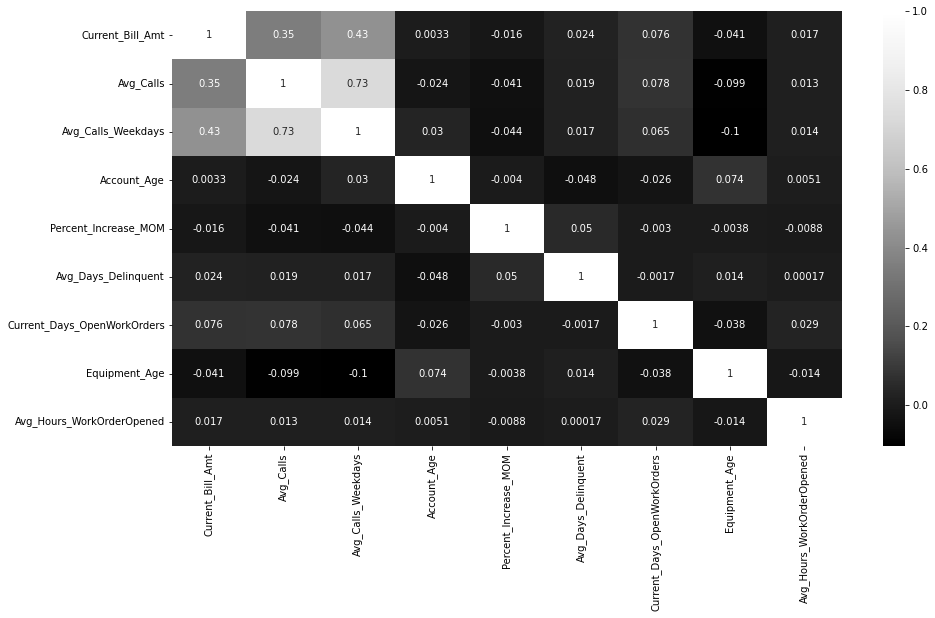

In [109]:
corr = telco.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           annot=True, cmap='Greys_r')

Text(0, 0.5, 'No of Customers')

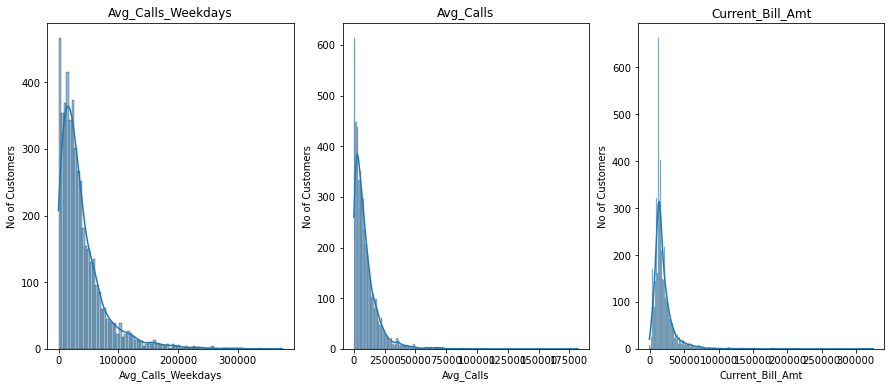

In [110]:
#Perform Univariate and Bivariate Analysis for Avg_Calls_Weekdays, Avg_Calls, Current_Bill_Amt

f, axes = plt.subplots(ncols=3, figsize=(15,6))

#Univatiate Plots

#Avg_Calls_Weekdays
sns.histplot(telco.Avg_Calls_Weekdays, kde = True, 
            ax = axes[0]).set_title('Avg_Calls_Weekdays')
axes[0].set_ylabel('No of Customers')


#Avg_Calls
sns.histplot(telco.Avg_Calls, kde = True, 
            ax = axes[1]).set_title('Avg_Calls')
axes[1].set_ylabel('No of Customers')



#Current_Bill_Amt
sns.histplot(telco.Current_Bill_Amt, kde = True, 
            ax = axes[2]).set_title('Current_Bill_Amt')
axes[2].set_ylabel('No of Customers')

### Bivariate Plots: 

1) Complaint_Code vs Target_Churn

2) Acct_Plan_Subtype vs Target_Churn

3) Current_TechSupComplaints vs Target_Churn

4) Avg_Days_Delinquetnt vs Target_Churn

5) Account_Age vs Target_code

6) Percent_Increase_MOM vs Target_code


Text(0.5, 1.0, 'Customer Complaint_Code by Churn')

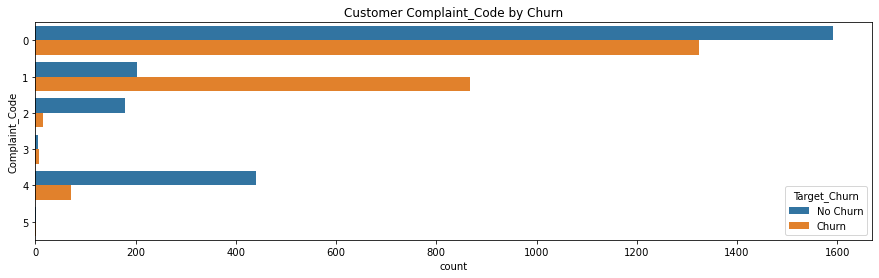

In [136]:

plt.figure(figsize=(15,4))

#1) Complaint_Code vs Target_Churn:

p=sns.countplot(y= 'Complaint_Code', hue='Target_Churn', data=telco)
legend= p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text('No Churn')
legend_txt[1].set_text('Churn')
p.set_title('Customer Complaint_Code by Churn')

Text(0.5, 1.0, 'Customer Acct_Plan_Subtype by Churn')

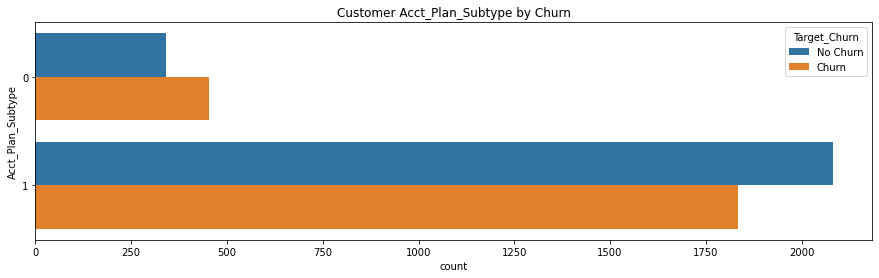

In [137]:
#2) Acct_Plan_Subtype vs Target_Churn
plt.figure(figsize=(15,4))
p=sns.countplot(y= 'Acct_Plan_Subtype', hue='Target_Churn', data=telco)
legend= p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text('No Churn')
legend_txt[1].set_text('Churn')
p.set_title('Customer Acct_Plan_Subtype by Churn')

Text(0.5, 1.0, 'Customer Current_TechSupComplaints by Churn')

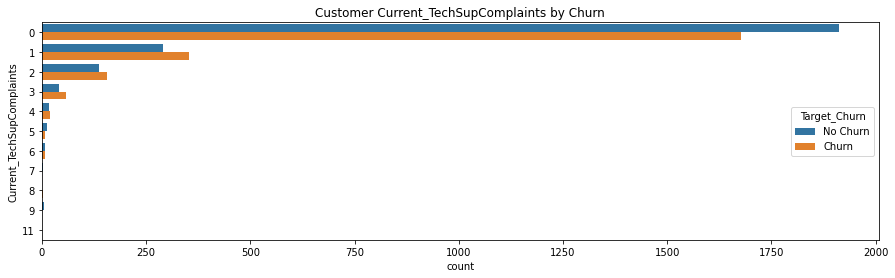

In [138]:
#3) Current_TechSupComplaints vs Target_Churn
plt.figure(figsize=(15,4))
p=sns.countplot(y= 'Current_TechSupComplaints', hue='Target_Churn', data=telco)
legend= p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text('No Churn')
legend_txt[1].set_text('Churn')
p.set_title('Customer Current_TechSupComplaints by Churn')

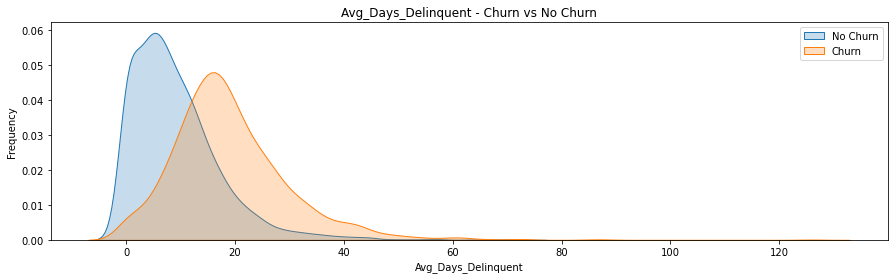

In [139]:
#4) Avg_Days_Delinquent vs Target_Code

plt.figure(figsize=(15,4))

ax = sns.kdeplot(telco.loc[(telco['Target_Code'] == 0), 'Avg_Days_Delinquent'], shade= True, label ='No Churn')

ax = sns.kdeplot(telco.loc[(telco['Target_Code'] == 1), 'Avg_Days_Delinquent'], shade = True, label ='Churn')
ax.set(xlabel='Avg_Days_Delinquent', ylabel = 'Frequency')
plt.title('Avg_Days_Delinquent - Churn vs No Churn')
plt.legend()

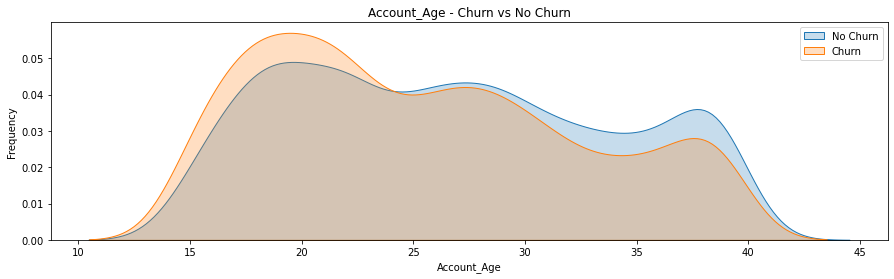

In [140]:
#5) Account_Age vs Target_code

plt.figure(figsize=(15,4))

ax = sns.kdeplot(telco.loc[(telco['Target_Code'] == 0), 'Account_Age'], shade= True, label ='No Churn')

ax = sns.kdeplot(telco.loc[(telco['Target_Code'] == 1), 'Account_Age'], shade = True, label ='Churn')
ax.set(xlabel='Account_Age', ylabel = 'Frequency')
plt.title('Account_Age - Churn vs No Churn')
plt.legend()

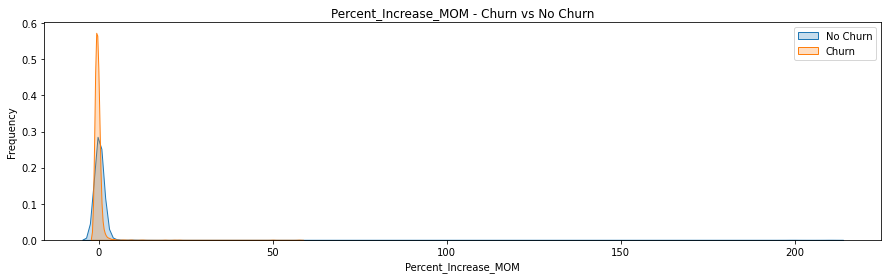

In [141]:
#6) Percent_Increase_MOM vs Target_Code

plt.figure(figsize=(15,4))

ax = sns.kdeplot(telco.loc[(telco['Target_Code'] == 0), 'Percent_Increase_MOM'], shade= True, label ='No Churn')

ax = sns.kdeplot(telco.loc[(telco['Target_Code'] == 1), 'Percent_Increase_MOM'], shade = True, label ='Churn')
ax.set(xlabel='Percent_Increase_MOM', ylabel = 'Frequency')
plt.title('Percent_Increase_MOM - Churn vs No Churn')
plt.legend()

### Interpret the Data 
1) In the correlation data
- Avg_Calls_Weekdays and Avg_Calls are highly correlated. 
- Current_Bill_Amt is also correlated with these variables, which is to be expected.

2) Univariate Analysis
- The histograms are depicting the correlation between the above variables.

3) Bivariate Analysis
- Call quality and Billing problems are the highest reason for churn
- A higher percentage of the Gold Plan customers have churned. The Gold plan may need to be reviewed in its offer. 
- The more complaints received the higher the client will churn. 
- As the number of days delinquent approaches 20, customers start to churn. 
- The first 20 days are the highest probablility for the customer to churn. After 20 days the churns decrease.
- If the percent increase MOM is between 0% - 10%, The client is more likely to churn. 


### End Activity 7.01

## Activity 7.02: Performing the MN Technique

Build a machine learning model that can predict future customer churn. 

In [142]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier

In [143]:
# Encode Acct_Plan_Subtype, Complaint_Code

telco['Acct_Plan_Subtype'] = telco['Acct_Plan_Subtype'].astype('category').cat.codes
telco['Complaint_Code'] = telco['Complaint_Code'].astype('category').cat.codes

In [144]:
#Split the training data in an 80 Training and 20 testing

target = 'Target_Code'
X = telco.drop(['Target_Churn','Target_Code'], axis=1)
y=telco[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20,random_state=123,stratify=y)

In [145]:
# Perform the feature selection using the Random Forest Classifieer

forest = RandomForestClassifier(n_estimators=500, random_state=1)

forest.fit(X_train, y_train)

importances = forest.feature_importances_

In [146]:
features = telco.drop(['Target_Churn', 'Target_Code'], axis=1).columns

indices = np.argsort(importances)[::-1]

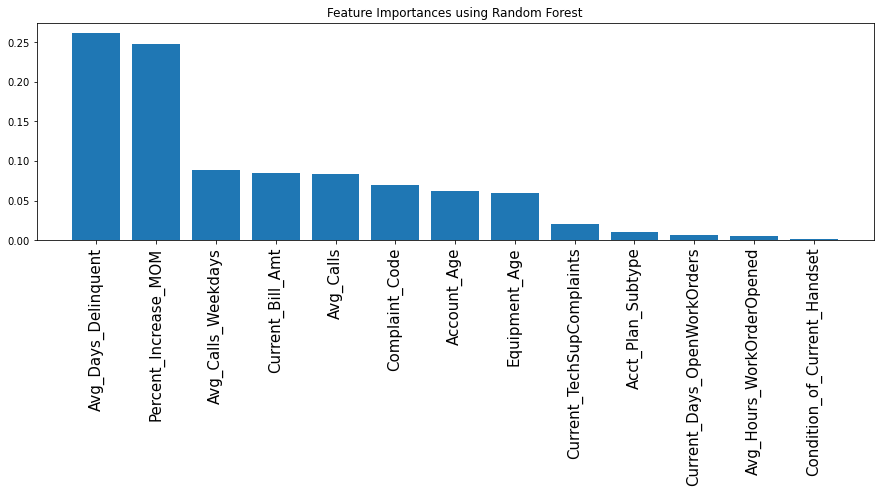

In [147]:
plt.figure(figsize=(15,4))
plt.title('Feature Importances using Random Forest')
plt.bar(range(X_train.shape[1]),importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), features[indices],
          rotation='vertical', fontsize=15)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [148]:
telco.dtypes

Target_Churn                      object
Target_Code                     category
Current_Bill_Amt                   int64
Avg_Calls                        float64
Avg_Calls_Weekdays               float64
Account_Age                        int64
Percent_Increase_MOM             float64
Acct_Plan_Subtype                   int8
Complaint_Code                      int8
Avg_Days_Delinquent              float64
Current_TechSupComplaints       category
Current_Days_OpenWorkOrders      float64
Equipment_Age                      int64
Condition_of_Current_Handset    category
Avg_Hours_WorkOrderOpened        float64
dtype: object

In [149]:
#Fit the top7 features in the statsmodel

top7_features = ['Avg_Days_Delinquent',
                'Percent_Increase_MOM',
                'Avg_Calls_Weekdays',
                'Current_Bill_Amt',
                'Avg_Calls',
                'Complaint_Code',
                'Account_Age']

logReg= sm.Logit(y_train, X_train[top7_features])
logistic_regression = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.552536
         Iterations 8


In [150]:
logistic_regression.summary
logistic_regression.params

Avg_Days_Delinquent     1.118007e-01
Percent_Increase_MOM   -3.771240e-01
Avg_Calls_Weekdays     -3.610827e-06
Current_Bill_Amt       -1.267340e-06
Avg_Calls              -5.438610e-07
Complaint_Code         -1.924303e-01
Account_Age            -4.764489e-02
dtype: float64

In [151]:
#Create a function to compute the target value of the given customers attributes. 

coef = logistic_regression.params

def y (coef,Avg_Days_Delinquent,Percent_Increase_MOM,
      Avg_Calls_Weekdays,Current_Bill_Amt,Avg_Calls,Complaint_Code,Account_Age): 
    return coef[0]*Avg_Days_Delinquent\
+coef[1]*Percent_Increase_MOM\
+coef[2]*Avg_Calls_Weekdays\
+coef[3]*Current_Bill_Amt\
+coef[4]*Avg_Calls\
+coef[5]*Complaint_Code\
+coef[6]*Account_Age

Test the model using these cucstomer parameters:
- Avg_Days_Delinquent: 40
- Percent_Increase_MOM: 5
- Avg_Calls_Weekdays: 39000     
- Current_Bill_Amt: 12000   
- Avg_Calls: 9000              
- Complaint_Code: 0         
- Account_Age: 17

In [152]:
y1 = y(coef, 40,5,39000,12000,9000,0,17)

p = np.exp(y1) / (1+np.exp(y1))

p

0.8341761898245407

The model predicted an 83% chance of the customer churning. 

### End Activity 7.02